In [64]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,normalize

from datetime import datetime,date

## Reading csv files

In [65]:
df_train = pd.read_csv("train.csv",na_values=' ')
df_test = pd.read_csv("test.csv",na_values=' ')
df_train.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Print our columns names

In [66]:
df_train.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [68]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,8099.0,7981.271398,6847.287340,1898.007675,3974.498315,5780.182197,8963.294993,83325.381190
Income,8099.0,37843.544265,30370.556860,0.000000,0.000000,34430.000000,62459.500000,99981.000000
Monthly Premium Auto,8099.0,93.140758,34.381153,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,8099.0,15.071490,10.086656,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,8099.0,48.147549,27.818744,0.000000,25.000000,48.000000,71.000000,99.000000
Number of Open Complaints,8099.0,0.389184,0.914152,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,8099.0,2.963823,2.390357,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,8099.0,431.464401,286.706233,0.099007,269.484578,383.167471,547.200000,2893.239678


## Count nulls then drop them

In [69]:
df_train.isna().sum()

Customer                         1035
State                            1035
Customer Lifetime Value          1035
Response                         1035
Coverage                         1035
Education                        1035
Effective To Date                1035
EmploymentStatus                 1035
Gender                           1035
Income                           1035
Location Code                    1035
Marital Status                   1035
Monthly Premium Auto             1035
Months Since Last Claim          1035
Months Since Policy Inception    1035
Number of Open Complaints        1035
Number of Policies               1035
Policy Type                      1035
Policy                           1035
Renew Offer Type                 1035
Sales Channel                    1035
Total Claim Amount               1035
Vehicle Class                    1035
Vehicle Size                     1035
dtype: int64

In [70]:
df_train = df_train.dropna()

In [71]:
print(df_train.shape,df_test.shape)

(8099, 24) (1035, 23)


In [72]:
categorical_features = ['State',  'Response', 'Coverage','Education', 'EmploymentStatus', 'Gender','Marital Status','Location Code','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size']

In [73]:
numerical_features = ['Income', 'Customer Lifetime Value', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies','Total Claim Amount']

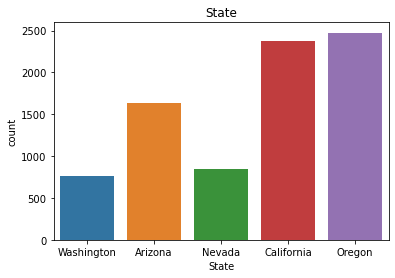

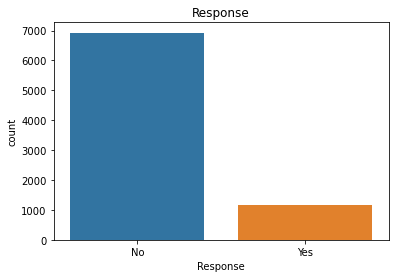

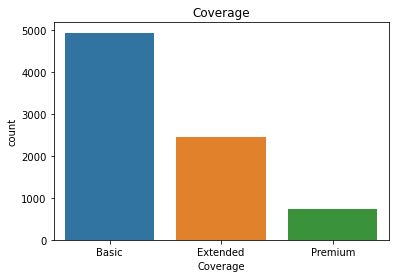

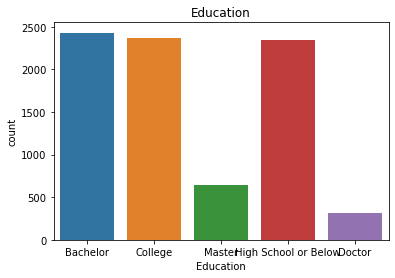

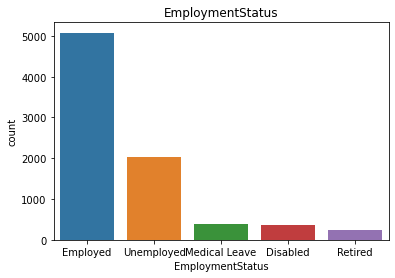

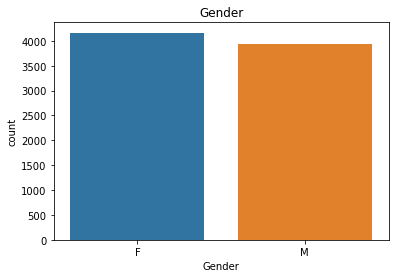

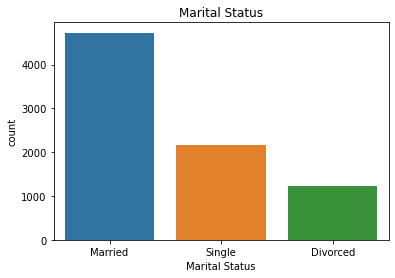

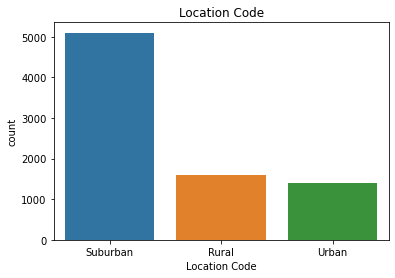

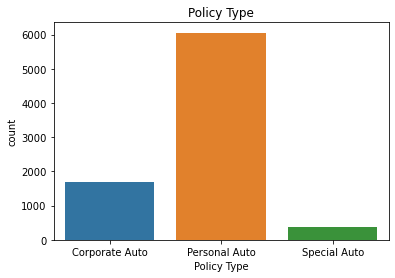

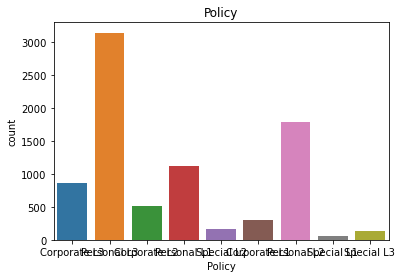

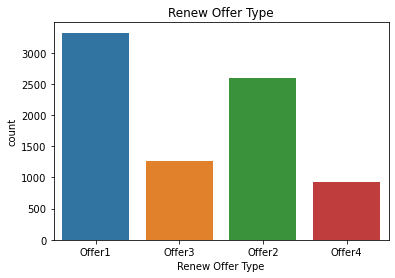

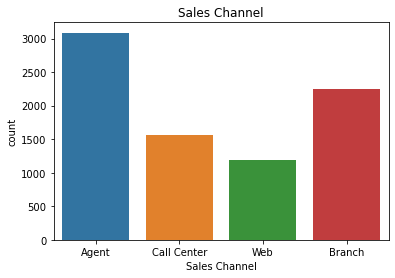

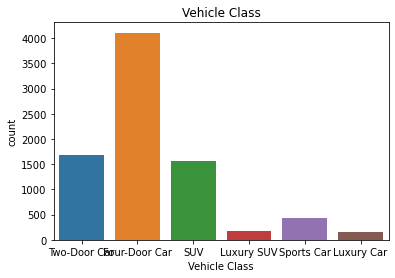

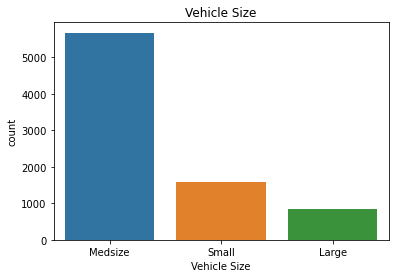

In [74]:
for i in categorical_features:
    ax=sns.countplot(x=df_train[i], data=df_train);
    plt.title(i)
    plt.show()

In [75]:
outliers_features = ['Customer Lifetime Value','Monthly Premium Auto', 'Total Claim Amount']

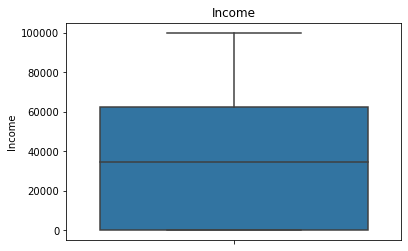

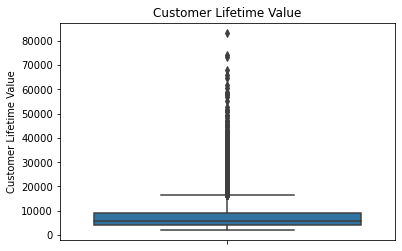

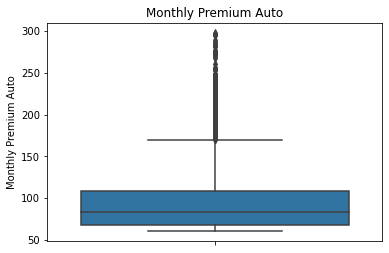

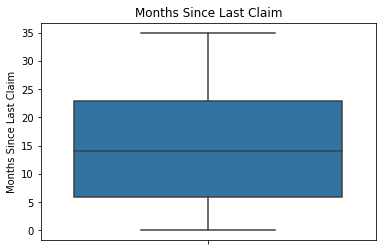

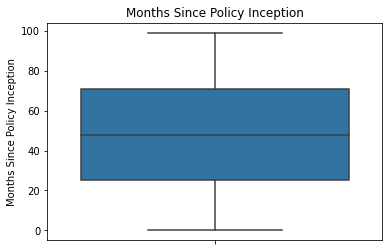

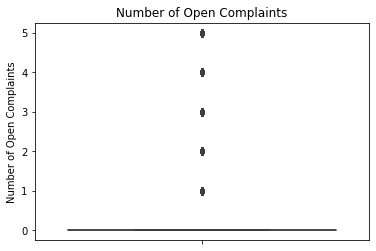

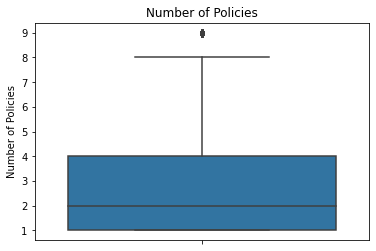

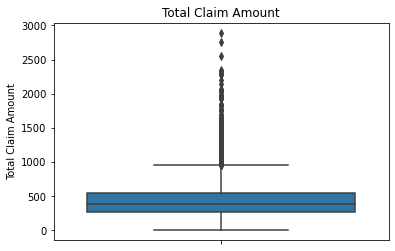

In [76]:
for i in numerical_features:
    sns.boxplot(y=df_train[i])
    plt.title(i)
    plt.show()

In [77]:
for i in outliers_features:
    #Finding upper and lower limt for features in train set
    Inter_Quartile_Range = df_train[i].quantile(0.75) - df_train[i].quantile(0.25)

    lower_boundary = df_train[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df_train[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df_train[i]= np.where(df_train[i] > upper_boundary, upper_boundary,np.where(df_train[i] < lower_boundary, lower_boundary,df_train[i]))

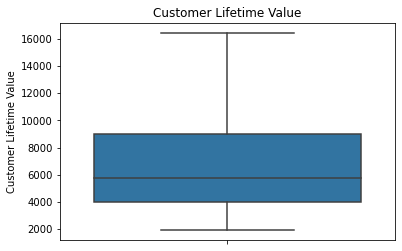

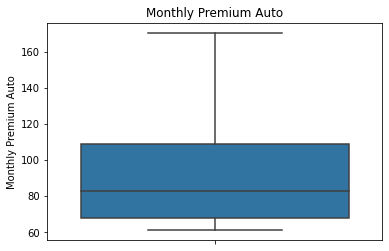

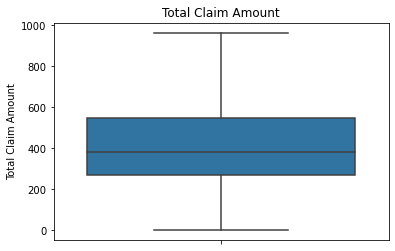

In [78]:
for i in outliers_features:
    sns.boxplot(y=df_train[i])
    plt.title(i)
    plt.show()

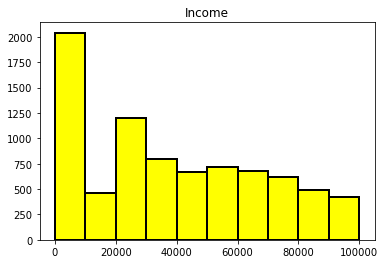

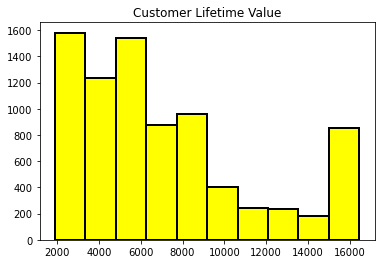

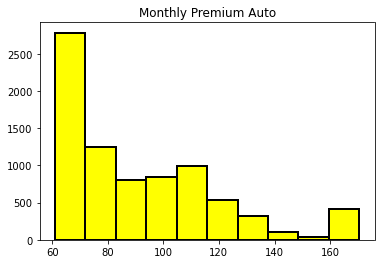

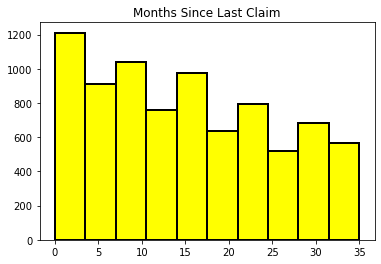

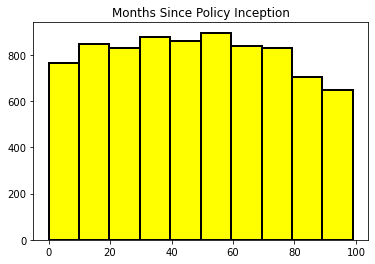

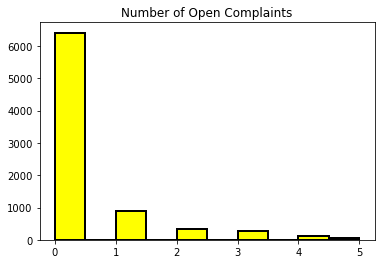

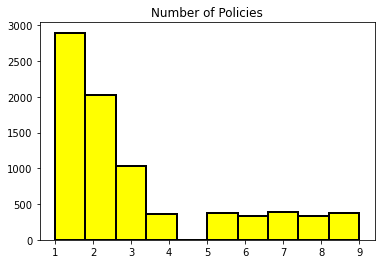

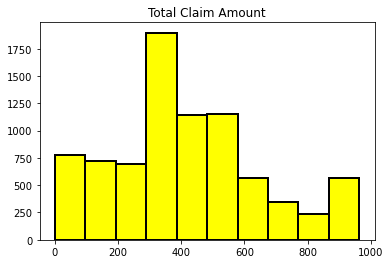

In [79]:
for i in numerical_features:
    plt.hist(df_train[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

In [80]:
df_train['Customer Lifetime Value']=round(np.log(df_train['Customer Lifetime Value']),1)
df_train['Income']=round(np.sqrt(df_train['Income']),1)
df_test['Income']=round(np.sqrt(df_test['Income']),1)
df_train['Monthly Premium Auto']=round(np.log(df_train['Monthly Premium Auto']),1)
df_test['Monthly Premium Auto']=round(np.log(df_test['Monthly Premium Auto']),1)

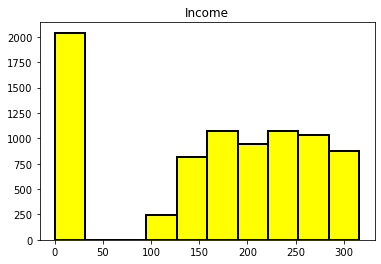

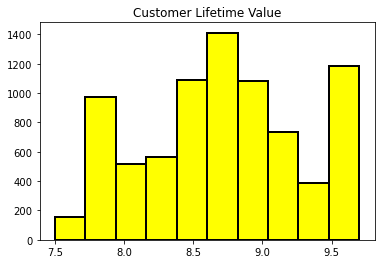

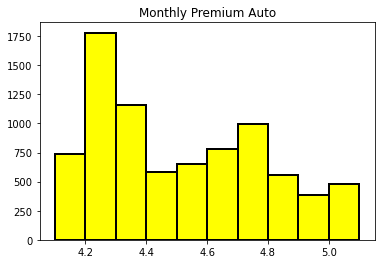

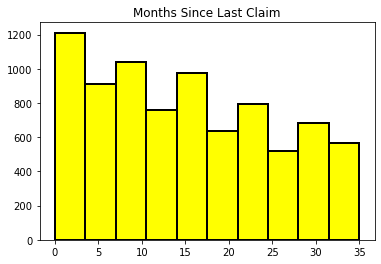

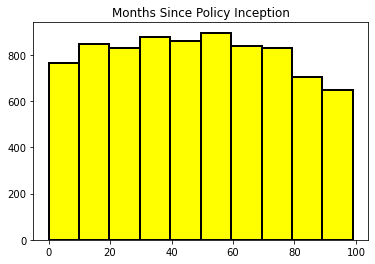

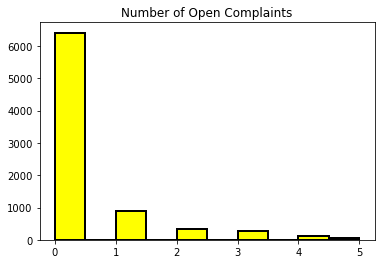

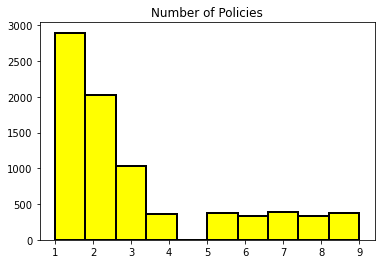

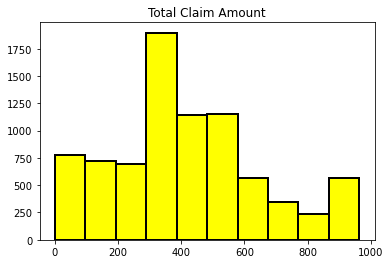

In [81]:
for i in numerical_features:
    plt.hist(df_train[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

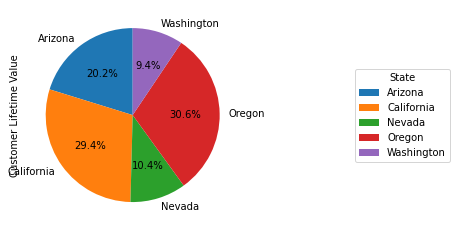

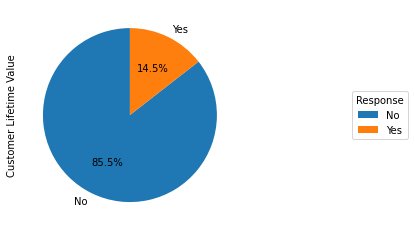

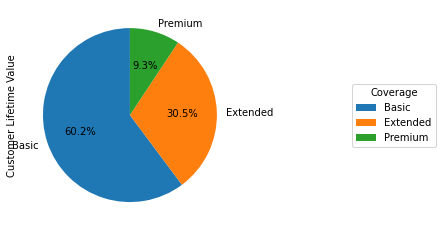

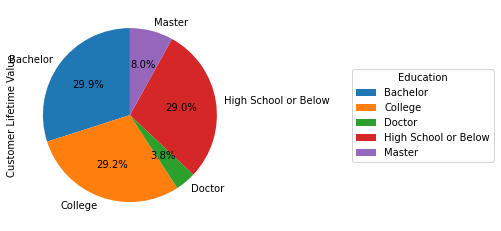

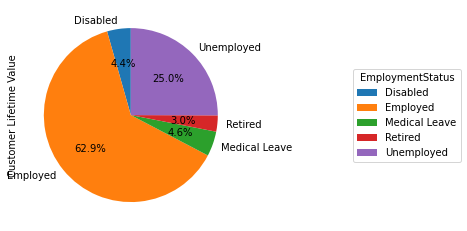

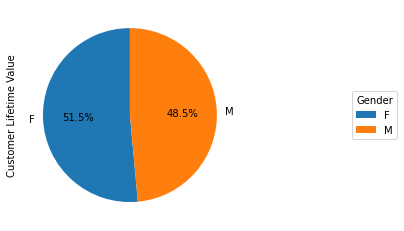

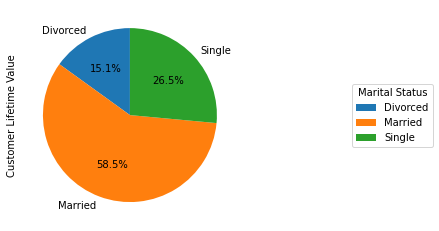

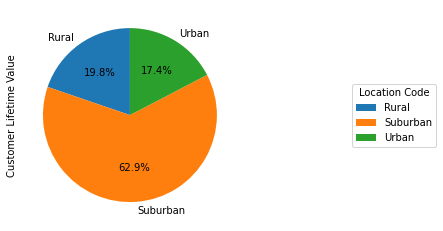

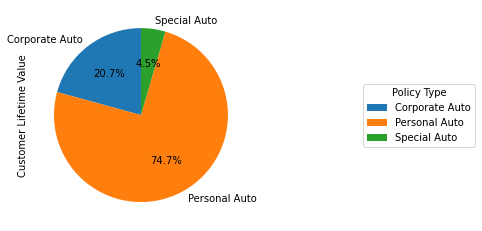

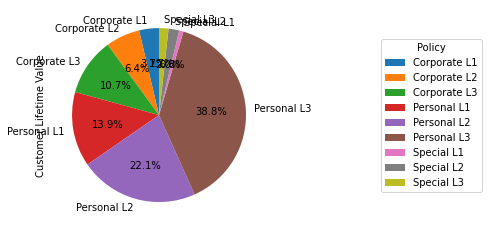

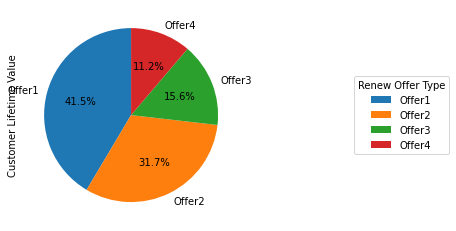

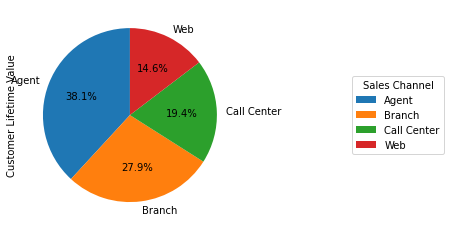

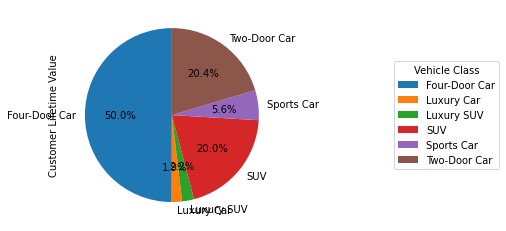

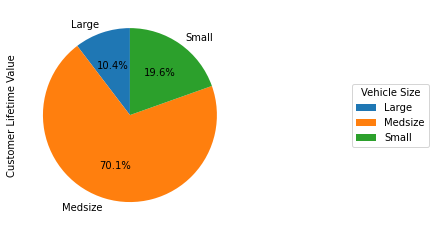

In [82]:
for i in categorical_features:
    df_train.groupby(df_train[i]).sum().plot(kind='pie', y='Customer Lifetime Value',autopct='%1.1f%%',startangle=90);
    plt.legend(title=i,loc="center left", bbox_to_anchor =(1.5, 0, 1, 1));

## Label encode for each categorical feature

In [83]:
le = preprocessing.LabelEncoder()
for i in categorical_features:
    df_train[i]= le.fit_transform(df_train[i])
    df_test[i]= le.fit_transform(df_test[i])
df_train.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,4,7.9,0,0,0,2/24/2011,1,0,237.2,...,5.0,0.0,1.0,0,2,0,0,384.811147,5,1
1,QZ44356,0,8.9,0,1,0,1/31/2011,4,0,0.0,...,42.0,0.0,8.0,1,5,2,0,963.773132,0,1
2,AI49188,2,9.5,0,2,0,2/19/2011,1,0,220.8,...,38.0,0.0,2.0,1,5,0,0,566.472247,5,1
3,WW63253,1,8.9,0,0,0,1/20/2011,4,1,0.0,...,65.0,0.0,7.0,0,1,0,2,529.881344,3,1
4,HB64268,4,7.9,0,0,0,2/3/2011,1,1,209.4,...,44.0,0.0,1.0,1,3,0,0,138.130879,0,1


## Transform data type to datetime

In [84]:
df_train['Effective To Date'] = pd.to_datetime(df_train['Effective To Date'])
df_test['Effective To Date'] = pd.to_datetime(df_test['Effective To Date'])
df_test.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,FH77504,1,1,2,0,2011-01-24,1,0,227.3,1,...,43,0,1,1,5,1,0,1358.400000,1,1
1,XK87182,3,0,2,1,2011-01-25,1,0,215.4,2,...,2,0,1,1,5,0,0,476.385575,0,1
2,HB17438,4,0,1,0,2011-02-21,1,1,303.4,2,...,77,0,3,1,3,3,3,617.288574,3,1
3,DH18269,0,0,1,1,2011-01-13,2,1,126.6,1,...,93,0,2,1,5,0,1,611.476898,5,1
4,DP19820,3,0,1,1,2011-01-15,4,1,0.0,1,...,84,4,2,1,4,1,1,980.528170,3,2


## Extract month and day from Effective to date column

In [85]:
df_train['Month'] = df_train['Effective To Date'].dt.month
df_train['Day'] = df_train['Effective To Date'].dt.day
df_test['Month'] = df_test['Effective To Date'].dt.month
df_test['Day'] = df_test['Effective To Date'].dt.day
df_test.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,Day
0,FH77504,1,1,2,0,2011-01-24,1,0,227.3,1,...,1,1,5,1,0,1358.400000,1,1,1,24
1,XK87182,3,0,2,1,2011-01-25,1,0,215.4,2,...,1,1,5,0,0,476.385575,0,1,1,25
2,HB17438,4,0,1,0,2011-02-21,1,1,303.4,2,...,3,1,3,3,3,617.288574,3,1,2,21
3,DH18269,0,0,1,1,2011-01-13,2,1,126.6,1,...,2,1,5,0,1,611.476898,5,1,1,13
4,DP19820,3,0,1,1,2011-01-15,4,1,0.0,1,...,2,1,4,1,1,980.528170,3,2,1,15


## Drop customer id and effective to date features

In [86]:
df_train = df_train.drop(['Customer','Effective To Date','Month','Day'],axis=1)
df_test = df_test.drop(['Customer','Effective To Date','Month','Day'],axis=1)
df_test.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,1,2,0,1,0,227.3,1,2,5.6,...,43,0,1,1,5,1,0,1358.400000,1,1
1,3,0,2,1,1,0,215.4,2,1,4.7,...,2,0,1,1,5,0,0,476.385575,0,1
2,4,0,1,0,1,1,303.4,2,1,4.9,...,77,0,3,1,3,3,3,617.288574,3,1
3,0,0,1,1,2,1,126.6,1,0,4.6,...,93,0,2,1,5,0,1,611.476898,5,1
4,3,0,1,1,4,1,0.0,1,2,4.9,...,84,4,2,1,4,1,1,980.528170,3,2


## Get the correlations between our features and drop features with the lowest correlations

<AxesSubplot:>

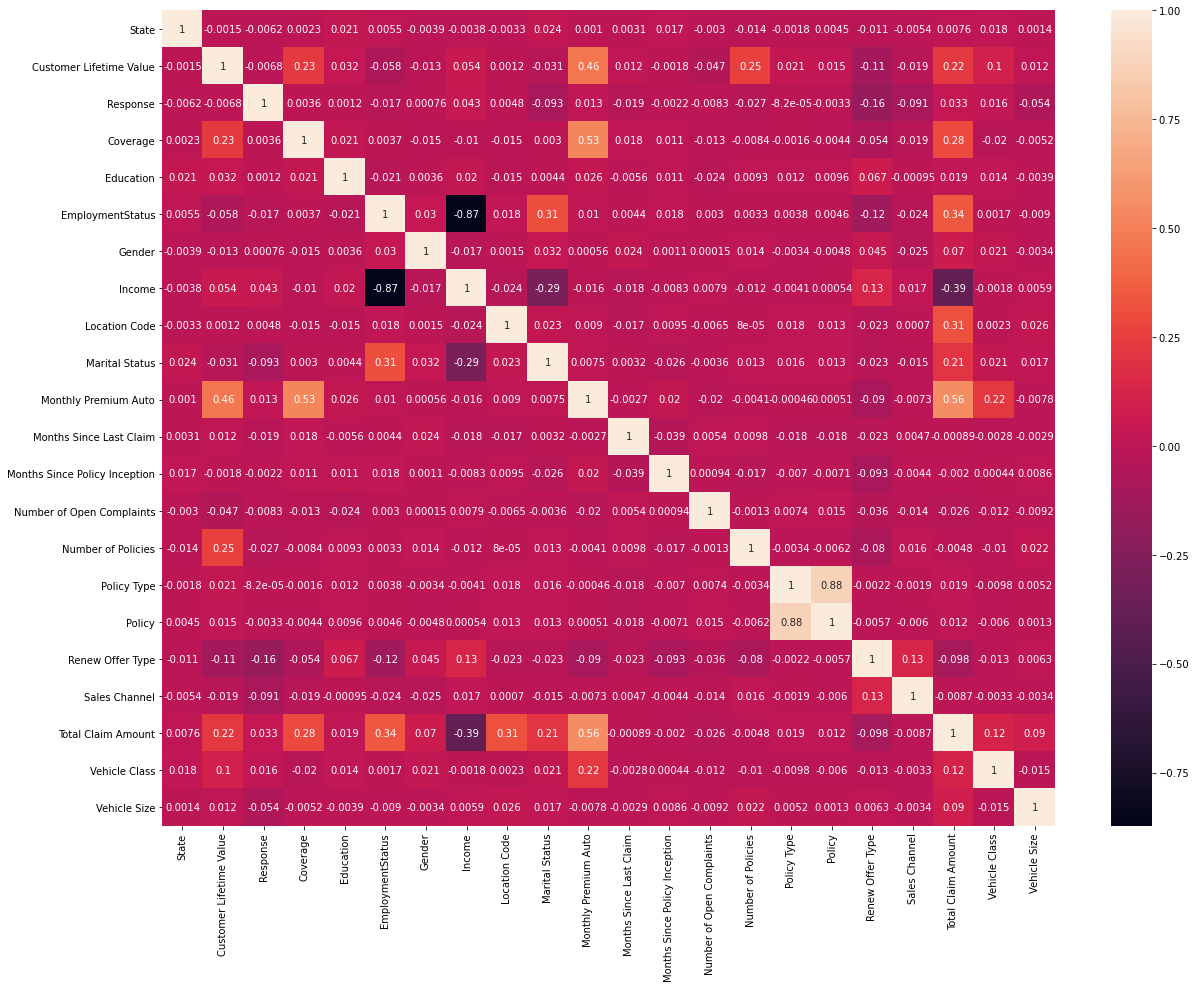

In [87]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True)

In [88]:
df_train = df_train.drop(['State','Months Since Policy Inception','Policy Type', 'Policy','Response',
                          'Number of Open Complaints','Vehicle Size'],axis=1)
df_test = df_test.drop(['State','Months Since Policy Inception','Policy Type', 'Policy','Response',
                       'Number of Open Complaints','Vehicle Size'],axis=1)
df_test.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,2,0,1,0,227.3,1,2,5.6,16,1,1,0,1358.400000,1
1,2,1,1,0,215.4,2,1,4.7,7,1,0,0,476.385575,0
2,1,0,1,1,303.4,2,1,4.9,7,3,3,3,617.288574,3
3,1,1,2,1,126.6,1,0,4.6,29,2,0,1,611.476898,5
4,1,1,4,1,0.0,1,2,4.9,12,2,1,1,980.528170,3


In [89]:
df_test.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,2,0,1,0,227.3,1,2,5.6,16,1,1,0,1358.400000,1
1,2,1,1,0,215.4,2,1,4.7,7,1,0,0,476.385575,0
2,1,0,1,1,303.4,2,1,4.9,7,3,3,3,617.288574,3
3,1,1,2,1,126.6,1,0,4.6,29,2,0,1,611.476898,5
4,1,1,4,1,0.0,1,2,4.9,12,2,1,1,980.528170,3


In [90]:
df_train.head()

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,7.9,0,0,1,0,237.2,1,1,4.2,32.0,1.0,0,0,384.811147,5
1,8.9,1,0,4,0,0.0,1,2,4.5,13.0,8.0,2,0,963.773132,0
2,9.5,2,0,1,0,220.8,1,1,4.7,18.0,2.0,0,0,566.472247,5
3,8.9,0,0,4,1,0.0,1,1,4.7,18.0,7.0,0,2,529.881344,3
4,7.9,0,0,1,1,209.4,0,2,4.3,12.0,1.0,0,0,138.130879,0


## Divide data to X and y

In [91]:
X = df_train.drop(['Customer Lifetime Value'], axis=1)
y = df_train['Customer Lifetime Value']
x_test = df_test

## Apply standardscaler in normalization

In [92]:
s = StandardScaler()
X = s.fit_transform(X)
df_test = s.transform(df_test)
X = pd.DataFrame(X,columns=df_train.drop(['Customer Lifetime Value'], axis=1).columns)
df_test = pd.DataFrame(df_test,columns=x_test.columns)
X.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,-0.734088,-1.12766,-0.608992,-0.972114,0.698821,0.039585,-0.181879,-0.954920,1.678411,-0.821611,-0.963079,-1.031035,-0.133689,1.498806
1,0.791934,-1.12766,1.621438,-0.972114,-1.535782,0.039585,1.393566,0.105099,-0.205382,2.107003,1.016359,-1.031035,2.276009,-0.910266
2,2.317956,-1.12766,-0.608992,-0.972114,0.544321,0.039585,-0.181879,0.811778,0.290353,-0.403238,-0.963079,-1.031035,0.622403,1.498806
3,-0.734088,-1.12766,1.621438,1.028686,-1.535782,0.039585,-0.181879,0.811778,0.290353,1.688629,-0.963079,0.833091,0.470108,0.535178
4,-0.734088,-1.12766,-0.608992,1.028686,0.436924,-1.604494,1.393566,-0.601580,-0.304529,-0.821611,-0.963079,-1.031035,-1.160397,-0.910266


In [93]:
df_test.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,2.317956,-1.127660,-0.608992,-0.972114,0.605555,0.039585,1.393566,3.991834,0.092059,-0.821611,0.026640,-1.031035,3.918486,-0.428451
1,2.317956,-0.403055,-0.608992,-0.972114,0.493448,1.683664,-0.181879,0.811778,-0.800264,-0.821611,-0.963079,-1.031035,0.247453,-0.910266
2,0.791934,-1.127660,-0.608992,1.028686,1.322475,1.683664,-0.181879,1.518457,-0.800264,0.015136,2.006079,1.765154,0.833905,0.535178
3,0.791934,-0.403055,0.134485,1.028686,-0.343115,0.039585,-1.757325,0.458438,1.380970,-0.403238,-0.963079,-0.098972,0.809717,1.498806
4,0.791934,-0.403055,1.621438,1.028686,-1.535782,0.039585,1.393566,1.518457,-0.304529,-0.403238,0.026640,-0.098972,2.345745,0.535178


## Split training data into train and test

In [94]:
from sklearn.model_selection import train_test_split  

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=42)  

np.shape(y_train)

(6479,)

In [95]:
# from sklearn import svm, datasets
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# parameters = {'iterations':np.arange(1000,5000,1000), 'learning_rate':np.arange(0,0.1,0.01), 'objective':['MAE','MAPE','Poisson','Quantile','RMSE','RMSEWithUncertainty','LogLinQuantile','Lq','Huber','Expectile','Tweedie','LogCosh'],
#              'l2_leaf_reg':np.arange(1,5,1),'random_strength':[0,1,2,3,4,5],'random_state':[42,0,1]}
# model = CatBoostRegressor()
# clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,cv=5,verbose=3)
# bm = clf.fit(x_train, y_train)
# sorted(clf.cv_results_)
# #print(bm.best_params_)

In [96]:
#print(bm.best_params_)

In [97]:
# parameters = {'objective':['reg:squarederror'],
#               'booster':['gbtree','gblinear'],
#               'learning_rate': [0.1], 
#               'max_depth': [7,10,15,20],
#               'min_child_weight': [10,15,20,25],
#               'colsample_bytree': [0.8, 0.9, 1],
#               'n_estimators': [300,400,500,600],
#               "reg_alpha"   : [0.5,0.2,1],
#               "reg_lambda"  : [2,3,5],
#               "gamma"       : [1,2,3]}

# model = xgb.XGBRegressor()

# clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,cv=5,verbose=3)
# bm = clf.fit(x_train, y_train)
# sorted(clf.cv_results_)

In [99]:
#print(bm.best_params_)

In [ ]:
# random_grid = {'bootstrap': [True, False],
#                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4],
#                'min_samples_split': [2, 5, 10],
#                'n_estimators': [130, 180, 230]}
# model = RandomForestRegressor()

# clf = RandomizedSearchCV(estimator=model, param_distributions=random_grid)
# bm = clf.fit(x_train, y_train)
# sorted(clf.cv_results_)

In [100]:
#print(bm.best_params_)

## Modeling

In [101]:
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor

# initializing all the model objects with default parameters
model =RandomForestRegressor()
# training all the model on the training dataset
model.fit(x_train, y_train)
# predicting the output on the validation dataset
pred = model.predict(x_test)
y_pred = model.predict(x_train)
y_pred2 = model.predict(x_val)

# printing the root mean squared error between real value and predicted value
print('Accuracy of model on train set: {:.2f}'.format(model.score(x_train, y_train)))
print('Accuracy of model on test set: {:.2f}'.format(model.score(x_val, y_val)))
print('mse of model on train set: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))
print('mse of model on test set: {:.2f}'.format(np.sqrt(mean_squared_error(y_val, y_pred2))))

Accuracy of model on train set: 0.99
Accuracy of model on test set: 0.95


NameError: name 'mean_squared_error' is not defined

## Put predictions to Clv column

In [102]:
df_test['Clv'] = pred
df_test['Clv']=round(np.exp(df_test['Clv']),1)

#df_test.drop(df_test.iloc[:,1:-1], inplace= True, axis = 1)
df_test.to_csv('test_ver2.csv', index=False)

In [105]:
df = pd.read_csv("test_ver2.csv",na_values=' ')
#df = df.drop(["Coverage"],axis=1)

In [106]:
df

,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Policies,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Clv
0,2.317956,-1.127660,-0.608992,-0.972114,0.605555,0.039585,1.393566,3.991834,0.092059,-0.821611,0.026640,-1.031035,3.918486,-0.428451,14086.9
1,2.317956,-0.403055,-0.608992,-0.972114,0.493448,1.683664,-0.181879,0.811778,-0.800264,-0.821611,-0.963079,-1.031035,0.247453,-0.910266,16042.6
2,0.791934,-1.127660,-0.608992,1.028686,1.322475,1.683664,-0.181879,1.518457,-0.800264,0.015136,2.006079,1.765154,0.833905,0.535178,14072.8
3,0.791934,-0.403055,0.134485,1.028686,-0.343115,0.039585,-1.757325,0.458438,1.380970,-0.403238,-0.963079,-0.098972,0.809717,1.498806,14086.9
4,0.791934,-0.403055,1.621438,1.028686,-1.535782,0.039585,1.393566,1.518457,-0.304529,-0.403238,0.026640,-0.098972,2.345745,0.535178,13960.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,-0.734088,-1.127660,-0.608992,1.028686,0.990864,1.683664,-0.181879,-0.601580,0.290353,-0.403238,0.026640,1.765154,-0.910239,-0.910266,14972.9
1031,0.791934,-0.403055,-0.608992,-0.972114,-0.150931,0.039585,-1.757325,-0.248241,-0.106235,-0.821611,-0.963079,-0.098972,-0.157043,-0.910266,16252.5
1032,0.791934,-1.127660,1.621438,1.028686,-1.535782,0.039585,1.393566,-0.248241,-0.601970,-0.403238,-0.963079,-0.098972,1.556015,-0.910266,16106.9
1033,0.791934,-0.403055,-0.608992,1.028686,-0.140568,0.039585,-0.181879,0.458438,1.876705,0.015136,1.016359,-0.098972,1.141532,-0.910266,16139.1
